# Chapter 4. Understanding Data Types in Python

## 4.1. A Python Integer is More Than Just an Integer
---

The standard Python implementation is written in C. This measn that every Python object is a cleverly disguised C structure. When we define an integer in Python, such as `x = 1000`, `x` is not just a "raw" integer. It's actually a pointer to a compound C structure containing several values.

A single integer in Python contains 4 pieces:
- `ob_refcnt`
  : a reference count that helps Python silently handle memory allocation and deallocation
- `ob_type`
  : encodes the type of the variable
- `ob_size`
  : specifies the size of the following data members
- `ob digit`
  : contains the actual integer value that we expect the Python variable to represent


## 4.2. A Python List is More Than Just a List
---

Let's consider what happens when we use a Python data structure that holds many Python objects. The standard mutable multi-element container in Python is the list.

In [1]:
L = list(range(10))
L2 = [str(c) for c in L]
print('L = ', L, '\n', type(L[0]))
print('\nL2 = ', L2, "\n", type(L2[0]))

L =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
 <class 'int'>

L2 =  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] 
 <class 'str'>


Because of Python's dynamic typing, we can create heterogenous lists.

In [2]:
L3 = [True, '2', 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

Flexibility comes at a cost: to allow flexible types, each item in the list must contain its own type, reference count, and other info. In the case that all variables are of the same type, much of this info is redundant. It can be much more **efficient** to store the data in a fixed-type array. The array contains a single pointer to one contiguous block of data. The Python list, on the other hand, contains a pointer to a block of pointers, each of which in turn points to a full Python object. The advantage of a list is that it can be filled with data of any desired type. Fixed-type **NumPy**-style arrays lack this flexibility, but are much more efficient for storing and manipulating data.

## 4.3 Creating Arrays from Python Lists
---

We'll start with the standard NumPy import, under the alias `np`.

In [3]:
import numpy as np

We can use `np.array` to create arrays from Python lists.

In [4]:
# Integer array
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

NumPy arrays can only contain data of the same type. If the types do not match, NumPy will **upcast* them according to its type promotion rules; here, integers are upcast to floating point.

In [5]:
np.array([3.14, 1, 2, 3])

array([3.14, 1.  , 2.  , 3.  ])

Use `dtype` to explicitly set the data type of the resulting array

In [6]:
np.array([1, 2, 3, 4], dtype = np.float32)

array([1., 2., 3., 4.], dtype=float32)

NumPy arrays can be multidimensional. Here's one way of initializing a multidimensional array using a list of lists.

In [7]:
# Nested lists resulting in multidimensional arrays
np.array([range(i, i + 3) for i in [1, 2, 3]])

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

## 4.4 Creating Arrays from Scratch
---

Especially for larger arrays, it is more efficient to create arrays from scratch using routines built into NumPy.

In [8]:
# Create a length-10 integer array filled with 0s
np.zeros(10, dtype = int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
# Create a 3x5 floating-point array filled with 1s
np.ones((3,5), dtype = float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [10]:
# Create a 3x5 floating point array filled with 3.14
np.full((3,5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [11]:
# Create an array filled with a linear sequence starting at 0, ending at 20, stepping by 2
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [12]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [13]:
# Create a 3x3 array of uniformly distributed pseudorandom values between 0 and 1
np.random.random((3,3))

array([[0.79510273, 0.71577164, 0.46526037],
       [0.51515548, 0.89775956, 0.47848838],
       [0.57764412, 0.04812632, 0.65016686]])

In [14]:
# Create a 3x3 array of normally distributed pseudorandom values with mean 0 and standard deviation 1
np.random.normal(0, 1, (3,3))

array([[ 0.4242467 ,  0.12026259, -0.01369033],
       [-1.45309025,  1.19435358,  0.79726741],
       [ 0.58518844,  0.25971989,  0.53483682]])

In [15]:
# Create a 3x3 array of pseudorandom integers in the interval [0,10)
np.random.randint(0, 10, (3,3))

array([[9, 8, 0],
       [8, 9, 7],
       [4, 9, 0]])

In [16]:
# Create a 3x3 identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [17]:
# Create an uninitialized array of three integers; the values will be whatever happens to already exist at the memory location
np.empty(3)

array([1., 1., 1.])

## 4.5 NumPy Standard Data Types
---

Note that when constructing an array, the standard NumPy data types can be specified using a string:
```
np.zeros(10, dtype='int16')
```
Or using the associated NumPy object:
```
np.zeros(10, dtype=np.int16)
```

A table of Standard NumPy data types:
|Data type |Description|
|----------|-----------|
|bool_|Boolean(t/f) stored as a byte|
|int_|Default integer type (same as C; normally either int32 or int64|
|intc|Identical to C int (normally int32 or int64)|
|intp|Integer used for indexing (same as C `ssize_t`; normally either int32 or int64)|
|int8|Byte (-128 to 127)|
|int16|Integer (-32768 to 32767)|
|int32|Integer (–2147483648 to 2147483647)|
|int64|Integer (–9223372036854775808 to 9223372036854775807)|
|uint8|Unsigned integer (0 to 255)|
|uint16|Unsigned integer (0 to 65535)|
|uint32|Unsigned integer (0 to 4294967295)|
|uint64|Unsigned integer (0 to 18446744073709551615)|
|float_|Shorthand for `float_64`|
|float16|Half-precision float: sign bit, 5 bits exponent, 10 bits mantissa|
|float32|float32 Single-precision float: sign bit, 8 bits exponent, 23 bits mantissa|
|float64|Double-precision float: sign bit, 11 bits exponent, 52 bits mantissa|
|complex_|Shorthand for `complex128`|
|complex64|Complex number, represented by two 32-bit floats|
|complex128|Complex number, represented by two 64-bit floats|

# Chapter 5. The Basics of NumPy Arrays

## 5.1 NumPy Array Attributes
---

In [18]:
rng = np.random.default_rng(seed=1701) # seed for reproducibility

x1 = rng.integers(10, size = 6) # 1-d array
x2 = rng.integers(10, size = (3, 4)) # 2-d array
x3 = rng.integers(10, size =(3, 4, 5)) # 3-d array

Each array has attributes including
- `ndim`
  : the number of dimensions
- `shape`
  : the size of each dimension
- `size`
  : the total size of the array
- `dtype`
- : the type of each element

In [19]:
print("x3 ndim : ", x3.ndim)
print("x3 shape: ", x3.shape)
print("x3 size: ", x3.size)
print("dtype : ", x3.dtype)

x3 ndim :  3
x3 shape:  (3, 4, 5)
x3 size:  60
dtype :  int64


## 5.2 Array Indexing: Accessing Single Elements
---

In a 1-d array, the i<sub>th</sub> value (counting from 0) can be accessed by specifying the desired index in **square brackets**, just as with Python lists:

In [20]:
print('x1 =', x1)
print('x1[0] = ', x1[0])
print('x1[4] = ', x1[4])

x1 = [9 4 0 3 8 6]
x1[0] =  9
x1[4] =  8


To index from the end of the array you can use negative indices:

In [21]:
print('x1[-1] = ', x1[-1])
print('x1[-2] = ', x1[-2])

x1[-1] =  6
x1[-2] =  8


In a multidimensional array, items can be accessed using a comma-separated tuple **( `[row, column]` )**:

In [22]:
print(x2)
print('\nx2[0,0] =', x2[0,0])
print('x2[1,2] =', x2[1,2])
print('x2[2,-1] =', x2[2,-1])

[[3 1 3 7]
 [4 0 2 3]
 [0 0 6 9]]

x2[0,0] = 3
x2[1,2] = 2
x2[2,-1] = 9


Values can be modified using any of the preceding index notation:

In [23]:
x2[0,0] = 12
print(x2)

[[12  1  3  7]
 [ 4  0  2  3]
 [ 0  0  6  9]]


Remember that NumPy arrays have a fixed type. This means, for example, if you attempt to insert a floating-point value into an integer array, the value will be *silently* truncated!

In [24]:
x1[0] = 3.14159
print(x1)

[3 4 0 3 8 6]


## 5.3 Array Slicing : Accessing Subarrays
---

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation, marked by the colon ( **`:`** ) character. The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array `x`, use this:
```
x[start:stop:step]
```
If any of these are unspecified, they default to the values:
- start = 0
- stop = size of dimension
- step = 1

### One-Dimensional Subarrays

In [25]:
print(x1)

[3 4 0 3 8 6]


In [26]:
print(x1[:3]) # first 3 elements

[3 4 0]


In [27]:
print(x1[3:]) # elements after index 3

[3 8 6]


In [28]:
print(x1[1:4]) # middle subarray

[4 0 3]


In [29]:
print(x1[::2]) # every second element

[3 0 8]


In [30]:
print(x1[1::2]) # every second element starting at index 1

[4 3 6]


> When a step value is negative, *the defaults for start and stop are swapped*, making it convenient to reverse an array.

In [31]:
print(x1[::-1]) # all elements reversed

[6 8 3 0 4 3]


In [32]:
print(x1[4::-2]) # every second element form index 4, reversed

[8 0 3]


### Multidimensional Subarrays

Multidimensional slices work in the same way, with multiple slices separated by commas.

In [33]:
print(x2)

[[12  1  3  7]
 [ 4  0  2  3]
 [ 0  0  6  9]]


In [34]:
print(x2[:2, :3]) # first two rows and three columns

[[12  1  3]
 [ 4  0  2]]


In [35]:
print(x2[:3, ::2]) # first three rows, every other column

[[12  3]
 [ 4  2]
 [ 0  6]]


In [36]:
print(x2[::-1, ::-1]) # all rows and columns, reversed

[[ 9  6  0  0]
 [ 3  2  0  4]
 [ 7  3  1 12]]


One commonly needed routine is accessing single rows or columns of an array. This can be done by combining indexing and slicing, using an empty slice marked by a single colon ( **`:`** ) :

In [37]:
print(x2[:, 0]) # first column of x2

[12  4  0]


In [38]:
print(x2[0, :]) # first row of x2

# alternatively, we can omit the empty slice for more compact syntax
print(x2[0])

[12  1  3  7]
[12  1  3  7]


## 5.4 Subarrays as No-Copy Views and Copy Views
---

Unlike Python list slices, NumPy array slices are returned as *views* rather than *copies* of the array data. Consider our 2-d array from before:

In [39]:
print(x2)

[[12  1  3  7]
 [ 4  0  2  3]
 [ 0  0  6  9]]


Let's extract a $2 \times 2$ subarray from this.

In [40]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[12  1]
 [ 4  0]]


Now if we modify this subarray, we will see *the original array has changed!* Observe:

In [41]:
x2_sub[0,0] = 99
print(x2_sub, "\n")
print(x2)

[[99  1]
 [ 4  0]] 

[[99  1  3  7]
 [ 4  0  2  3]
 [ 0  0  6  9]]


This can be advantageous; for example, when working with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer.

### Creating Copies of Arrays

It's sometimes useful to instead explicitly copy the data within an array or a subarray. The easiest way is with the **`copy`** method:

In [42]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  1]
 [ 4  0]]


Now if we modify this subarray, *the original array is not touched*.

In [43]:
x2_sub_copy[0,0] = 42
print(x2_sub_copy, "\n")
print(x2)

[[42  1]
 [ 4  0]] 

[[99  1  3  7]
 [ 4  0  2  3]
 [ 0  0  6  9]]


## 5.5 Reshaping of Arrays
---

This can be done with the **`reshape`** method.

In [44]:
grid = np.arange(1, 10).reshape(3,3) # putting the numbers 1-9 in a 3x3 grid
print(grid)

# for this to work, the initial array must match the size of the reshaped array

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In most cases, the `reshape` method will return a *no-copy* view of the initial array.

A common reshaping operation is converting a 1-d array into a 2-d row or column matrix:

In [45]:
x = np.array([1, 2, 3])
x.reshape((1,3)) # row vector via reshape

array([[1, 2, 3]])

In [46]:
x.reshape((3,1)) # column vector via reshape

array([[1],
       [2],
       [3]])

A convenient shorthand is to use **`np.newaxis`** in the slicing syntax:

In [47]:
x[np.newaxis,:] # row vector via newaxis

array([[1, 2, 3]])

In [48]:
x[:, np.newaxis] # column vector via newaxis

array([[1],
       [2],
       [3]])

## 5.6 Array Concatenation and Splitting
---

### Concatenation of Arrays

Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines **`np.concatenate`**, **`np.vstack`**, **`np.hstack`**.

`np.concatenate` takes a tuple of arrays as its first argument.

In [49]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

np.concatenate([x, y])

array([1, 2, 3, 4, 5, 6])

In [50]:
z = np.array([7, 8, 9])
np.concatenate([x, y, z]) # concatenating more than two arrays at once

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
grid = np.array([[1, 2, 3],
                [4, 5, 6]])

# can be used for 2-d arrays
np.concatenate([grid, grid]) # concatenate along the first axis

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [52]:
np.concatenate([grid, grid], axis = 1) # concatenate along the second axis (zero-indexed)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

For working with arrays with mixed dimensions, it can be clearer to use `np.vstack` and `np.hstack`.

In [53]:
np.vstack([x, grid]) # vertically stack the arrays

array([[1, 2, 3],
       [1, 2, 3],
       [4, 5, 6]])

In [54]:
y = np.array([[99],
              [99]])
np.hstack([grid, y]) # horizontally stack the arrays

array([[ 1,  2,  3, 99],
       [ 4,  5,  6, 99]])

For higher-dimensional arrays, **`np.dstack`** will stack arrays along the third axis.

### Splitting of Arrays

The opposite of concatenation is splitting, which is implemented by **`np.split`**, **`np.hsplit`**, and **`np.vsplit`**.

In [55]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3,5]) # pass a list of indices giving the split points
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


Notice how $N$ split points lead to $N+1$ subarrays. `np.hsplit` and `np.vsplit` are similar.

In [56]:
grid = np.arange(16).reshape(4,4)
print(grid)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [57]:
upper, lower = np.vsplit(grid, [2])
print(upper, '\n')
print(lower)

[[0 1 2 3]
 [4 5 6 7]] 

[[ 8  9 10 11]
 [12 13 14 15]]


In [58]:
left, right = np.hsplit(grid, [2])
print(left, '\n')
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]] 

[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


For higher-dimensional arrays, **`np.dsplit`** will split arrays along the third axis

# Chapter 6. Computation on NumPy Arrays: Universal Functions

## 6.1 Slowness of Loops
---

Python loops are slow; the type checking and function dispatches slow down the process dramatically.

In [59]:
rng = np.random.default_rng(seed = 1701)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

values = rng.integers(1,10, size = 5)
compute_reciprocals(values)

array([0.11111111, 0.25      , 1.        , 0.33333333, 0.125     ])

In [60]:
big_array = rng.integers(1, 100, size = 1000000)
%timeit compute_reciprocals(big_array)

3.38 s ± 951 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It takes several seconds to compute these million operations and to store the result.

## 6.2 Introducing Ufuncs
---

For many types of operations, NumPy provides a convenient interface into a kind of statically typed, compiled routine. This is known as a ***vectorized*** operation. For simple operations like the element-wise division, vectorization is simple as using Python arithmetic operators *directly* on the array object. This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.

Compare the results of the following two operations:

In [61]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.11111111 0.25       1.         0.33333333 0.125     ]
[0.11111111 0.25       1.         0.33333333 0.125     ]


Looking at the execution time for our big array, we see that it completes orders of magnitude faster than the Python loop.

In [62]:
%timeit (1.0 / big_array)

7.81 ms ± 465 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Vectorized operations in NumPy are implemented via ***ufuncs***, whose main purpose is to quickly execute repeated operations on values in NumPy arrays. Ufuncs are extremely flexible - before we saw an operation between a scalar and an array, but we can also operate on two arrays and multidimensional arrays.

In [63]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [64]:
x = np.arange(9).reshape((3,3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

## 6.3 NumPy's Ufuncs
---

Ufuncs exist in two flavors: ***unary ufuncs*** operate on a single input, and ***binary ufuncs*** operate on two inputs.

### Array Arithmetic

NumPy's ufuncs should feel natural to use because they make use of Python's native arithmetic operators. The standard addition, subtraction, multiplication, and division can all be used.

In [65]:
x = np.arange(4)
print('x      =', x)
print('x + 5  =', x + 5)
print('x - 5  =', x - 5)
print('x * 2  =', x * 2)
print('x / 2  =', x /2)
print('x // 2 =', x // 2)

x      = [0 1 2 3]
x + 5  = [5 6 7 8]
x - 5  = [-5 -4 -3 -2]
x * 2  = [0 2 4 6]
x / 2  = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


In [66]:
# ufuncs for negation, exponentiation, and modulus too
print('-x     =', -x)
print('x ** 2 =', x ** 2)
print('x % 2  =', x % 2)

-x     = [ 0 -1 -2 -3]
x ** 2 = [0 1 4 9]
x % 2  = [0 1 0 1]


In [67]:
# these can be strung together however; standard order of operations is respected
-(0.5*x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

Arithmetic operators implemented in NumPy

|Operator|Equivalent ufunc|Description|
|--------|----------------|-----------|
|+|np.add|Addition (1 + 1 = 2)|
|-|np.subtract|Subtraction (3 - 2 = 1)|
|-|np.negative|Unary negation (-2)|
|*|np.multiply|Multiplication (2 * 3 = 6)|
|/|np.divide|Division (3 / 2 = 1.5)|
|//|np.floor_divide|Floor division ( 3 // 2 = 1)|
|**|np.power|Exponentiation (2 ** 3 = 8)|
|%|np.mod|Modulus/remainder ( 9 % 4 = 1)|

### Absolute Value

Just as NumPy understands Python's built-in arithmetic operators, it also understands Python's built-in absolute value function **`abs`**. The corresponding NumPy ufunc is **`np.absolute`** which is also available under the alias **`np.abs`**.

In [68]:
x = np.array([-2, -1, 0, 1, 2])
print(abs(x))
print(np.absolute(x))
print(np.abs(x))

[2 1 0 1 2]
[2 1 0 1 2]
[2 1 0 1 2]


### Trigonometric Functions

Start by defining an array of angles.

In [69]:
theta = np.linspace(0, np.pi, 3)
print('theta      =', theta)
print('sin(theta) =', np.sin(theta))
print('cos(theta) =', np.cos(theta))
print('tan(theta) =', np.tan(theta))

theta      = [0.         1.57079633 3.14159265]
sin(theta) = [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) = [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) = [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


The values are computed to *within machine precision*, which is why values that should be zero do not always hit exactly zero.

In [70]:
x = np.array([-1, 0, 1])
print('x         =', x)
print('arcsin(x) =', np.arcsin(x))
print('arccos(x) =', np.arccos(x))
print('arctan(x) =', np.arctan(x))

x         = [-1  0  1]
arcsin(x) = [-1.57079633  0.          1.57079633]
arccos(x) = [3.14159265 1.57079633 0.        ]
arctan(x) = [-0.78539816  0.          0.78539816]


### Exponents and Logarithms

In [71]:
x = np.array([1, 2, 3])
print('x   =', x)
print('e^x =', np.exp(x))
print('2^x =', np.exp2(x))
print('3^x =', np.power(3.,x))

x   = [1 2 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3.  9. 27.]


The inverse of the exponentials, the logarithms, are also available. The basic **`np.log`** gives the *natural logarithm*. Base-2 and base-10 are also available.

In [72]:
x = np.array([1, 2, 4, 10])
print('x        =', x)
print('ln(x)    =', np.log(x))
print('log2(x)  =', np.log2(x))
print('log10(x) =', np.log10(x))

x        = [ 1  2  4 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


There are also some specialized versions that are useful for maintaining precision with very small input:

In [73]:
x = np.array([0, 0.001, 0.01, 0.1])
print('exp(x) - 1 =', np.expm1(x))
print('log(1 + x) =', np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


When `x` is very small, these functions give more precise values than if the raw `np.log` or `np.exp` were to be used.

### Specialized Ufuncs

NumPy has many more ufuncs available, including hyperbolic trig, bit-wise arithmetic, comparison operations, conversions from radians to degrees, rounding and remainders, and much more.

Another excellent source for more specialized ufuncs is the submodule `scipy.special`. The following snippet shows a couple that might come up in a statistics context.

In [74]:
from scipy import special

#Gamma functions (generalized factorials) and related functions
x = np.array([1, 5, 10])
print('gamma(x)     =', special.gamma(x))
print('ln|gamma(x)| =', special.gammaln(x))
print('beta(x, 2)   =', special.beta(x, 2))

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]


In [75]:
# Error function (integral of Gaussian), its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1.0])
print('erf(x)    =', special.erf(x))
print('erfc(x)   =', special.erfc(x))
print('erfinv(x) =', special.erfinv(x))

erf(x)    = [0.         0.32862676 0.67780119 0.84270079]
erfc(x)   = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


### Specifying Output

For large calculations, it is sometimes useful to be able to specify the array where the result of the calculation will be stored. For all ufuncs, this can be done using the **`out`** argument of the function.

In [76]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out = y)
print(y)

[ 0. 10. 20. 30. 40.]


This can be used with array views. For example, we can write the results of a computation to every other element of a specified array.

In [77]:
y = np.zeros(10)
np.power(2, x, out = y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


If we had just written `y[::2] = 2 ** x`, this would have resulted in the creation of a temporary array to hold the results of `2 ** x`, followed by a second operation copying those values into the `y` array. This doesn't make much of a difference for such a small computation, but for very large arrays the memory savings from careful use of the `out` argument can be significant.

### Aggregations

For binary ufuncs, aggregations can be computed directly from the object.

In [78]:
# calling reduce on the add ufunc returns the sum of all elements in the array
x = np.arange(1, 6)
np.add.reduce(x)

15

In [79]:
# calling reduce on the multiply ufunc results in the product of all array elements
np.multiply.reduce(x)

120

In [80]:
# if we'd like to store all the intermediate results, we can use accumulate
print(np.add.accumulate(x))
print(np.multiply.accumulate(x))

[ 1  3  6 10 15]
[  1   2   6  24 120]


Note that for these particular cases, there are dedicated NumPy functions to compute the results which are explored in Chapter 7.

### Outer Products

Any ufunc can compute the output of  all pairs of two different inputs using the **`outer`** method. This allows you, in one line, to do things like create a multiplication table.

In [81]:
x = np.arange(1,6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

### Ufuncs : Learning More

More information on universal functions can be found on the [NumPy](https://numpy.org/) and [SciPy](https://scipy.org/) documentation websites.

# Chapter 7 : Aggregations: Min, Max, and Everything in Between

## 7.1 Summing Values in an Array
---

In [82]:
rng = np.random.default_rng()
L = rng.random(100)

# Python itself can sum all values in an array using the sum function
sum(L)

53.95638625235304

In [83]:
# the syntax is similar to that of the NumPy sum function
# the result is the same in the simplest case
np.sum(L)

53.95638625235303

NumPy's version **`np.sum`** is computed more quickly than Python's `sum`.

In [84]:
big_array = rng.random(100000)
%timeit sum(big_array)
%timeit np.sum(big_array)

13.7 ms ± 858 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
60.9 μs ± 5.2 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Be careful though; the `sum` function and the `np.sum` function are not identical, which can lead to confusion! In particular, their optional arguments have different meanings. `sum(x , 1)` initializes the sum at 1 while `np.sum(x, 1)` sums along axis 1. This is because `np.sum` is aware of multidimensional arrays.

## 7.2 Minimum and Maximum
---

In [85]:
# Python's built-in min, max functions to find min/max value of a given array
min(big_array), max(big_array)

(3.924228851204248e-06, 0.9999982289791639)

In [86]:
# corresponding NumPy functions; once again they operate much more quickly
np.min(big_array), np.max(big_array)

(3.924228851204248e-06, 0.9999982289791639)

In [87]:
%timeit min(big_array)
%timeit np.min(big_array)

9.08 ms ± 370 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
88.2 μs ± 2.95 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


For min, sum, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself.

In [88]:
print(big_array.min(), big_array.max(), big_array.sum())

3.924228851204248e-06 0.9999982289791639 50040.51834186015


## 7.3 Multidimensional Aggregates
---

One common type of aggregation operation is an aggregate along a row or column. 

In [89]:
M = rng.integers(0, 10, (3,4))
print(M)

[[0 0 5 9]
 [7 6 6 4]
 [2 4 2 3]]


In [90]:
# NumPy aggregations will apply across all elements of a multidimensional array
M.sum()

48

Specify the argument **`axis`** along which for the aggregate to be computed.

In [91]:
# axis = 0 : columns
print(M.min(axis = 0))
print(M.max(axis = 0))

[0 0 2 3]
[7 6 6 9]


In [92]:
# axis = 1 : rows
print(M.min(axis = 1))
print(M.max(axis = 1))

[0 4 2]
[9 7 4]


Another way to think about it is that the `axis` keyword specifies the dimension that will be *collapsed*, rather than the dimension that will be returned.

## 7.4 Other Aggregation Functions
---

|Function name|NaN-safe version|Description|
|-------------|----------------|------------|
|np.sum|np.nansum|Compute sum of elements|
|np.prod|np.nanprod|Compute product of elements|
|np.mean|np.nanmean|Compute mean of elements|
|np.std|np.nanstd|Compute standard deviation|
|np.var|np.nanvar|Compute variance|
|np.min|np.nanmin|Find minimum value|
|np.max|np.nanmax|Find maximum value|
|np.argmin|np.nanargmin|Find index of minimum value|

# Chapter 8 : Computation on Arrays : Broadcasting

## 8.1 Introducing Brodcasting
---

We saw in Chapter 6 how NumPy's universal functions can be used to *vectorize* operations and thereby remove slow Python loops. This chapter discusses *broadcasting* : a set of rules by which NumPy lets you apply binary operations (e.g., addition, subtraction, multiplication, etc.) between arrays of different sizes and shapes.

Recall that for arrays of the same size, binary operations are preformed on an element-by-element basis:

In [94]:
import numpy as np

a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be performed of different sizes - for example, we can easily add a scalar (think of it as a zero-dimensional array) to an array:

In [95]:
a + 5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value 5 into the array `[5, 5, 5]` and adds the result. 

We can similarly extend this idea to array of higher dimension. Observe the result when we add a 1-d array to a 2-d array:

In [97]:
M = np.ones((3,3))
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

The 1-d array `a` is stretched, or broadcasted, across the second dimension in order to match the shape of `M`.

While these examples are relatively easy to understand, more complicated cases can involve broadcasting of both arrays. Consdier the following examples.

In [98]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [99]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

We've stretched *both* `a` and `b` to match a common shape, and the result is a 2-d array.

## 8.2 Rules of Broadcasting
---

***Rule 1*** :
    If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.

***Rule 2***
    : If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

***Rule 3***
    : If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

### Broadcasting Example 1

Suppose we want to add a 2-d array to a 1-d array.

In [109]:
M = np.ones((2,3))
a = np.arange(3)
print(M)
print(a)

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]


Let's consider an operation on these two arrays, which have the following shapes:

In [107]:
print(M.shape)
print(a.shape)

(2, 3)
(3,)


By ***Rule 1***, array `a` has fewer dimensions, so we pad it on the left with ones. `a.shape` becomes `(1, 3)`.

By ***Rule 2***, we see that the first dimension of `M` and `a` disagrees, so we stretch this dimension to match. `a.shape` becomes `(2, 3)`.

The shapes now match, and we see that the final shape will be `(2, 3)`

In [108]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Broadcasting Example 2

Let's take a look at an example where both arrays need to be broadcast:

In [111]:
a = np.arange(3).reshape((3,1))
b = np.arange(3)
print(a)
print(b)

[[0]
 [1]
 [2]]
[0 1 2]


In [112]:
print(a.shape)
print(b.shape)

(3, 1)
(3,)


***Rule 1*** says we must pad the shape of `b` with ones. Thus, `b.shape` becomes `(1, 3)`.

***Rule 2*** says we must upgreade each of these 1s to match the corresponding size of the other array. Thus, `a.shape` becomes `(3, 3)` and `b.shape` becomes `(3, 3)`.

In [113]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting Example 3

Let's take a look at an example in which the two arrays are not compatible:

In [115]:
M = np.ones((3, 2))
a = np.arange(3)
print(M)
print(a)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]


In [116]:
print(M.shape)
print(a.shape)

(3, 2)
(3,)


***Rule 1*** tells us we must pad the shape of `a` with ones. Thus, `a.shape` becomes `(1, 3)`.

***Rule 2*** tells us that the first dimension of `a` will be stretched to match that of `M`. Thus, `a.shape` becomes `(3, 3)`.

Now because `M.shape` is `(3, 2)` and `a.shape` is `(3, 3)`, ***Rule 3*** says these two arrays are incompatible.

In [117]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

Remember that the shape padding happens on the left, not the right. Also, these broadcasting rules apply to *any* binary ufunc.

## 8.3 Broadcasting in Practice
---

### Centering an Array

In Chapter 6, we saw that ufuncs allow a NumPy user to remove the need to explicitly write slow Python loops. Broadcasting extends this ability. One commonly seen example in data science is subtracting the row-wise mean from an array of data. Imagine we have an array of 10 observations, each of which consists of 3 values. Using the standard convention, we'll store this in a $10 \times 3$ array:

In [120]:
rng = np.random.default_rng(seed=1701)
X = rng.random((10,3))
X

array([[0.4020733 , 0.30563311, 0.67668051],
       [0.15821208, 0.79247763, 0.09419469],
       [0.36753944, 0.06388928, 0.96431608],
       [0.35200998, 0.54550343, 0.88597945],
       [0.57016965, 0.26614394, 0.8170382 ],
       [0.55906652, 0.06387035, 0.84877751],
       [0.89414484, 0.18920785, 0.23660015],
       [0.16502896, 0.56583856, 0.29513111],
       [0.29078012, 0.90079544, 0.59992434],
       [0.09133896, 0.00578466, 0.97096222]])

We compute the mean of each column using the `mean` aggregate across the first dimension.

In [119]:
Xmean = X.mean(0)
Xmean

array([0.38503638, 0.36991443, 0.63896043])

Now we can center the `X` array by subtracting the mean (this is a broadcasting operation)

In [122]:
X_centered = X - Xmean
X_centered

array([[ 0.01703691, -0.06428131,  0.03772009],
       [-0.2268243 ,  0.4225632 , -0.54476574],
       [-0.01749695, -0.30602514,  0.32535566],
       [-0.0330264 ,  0.175589  ,  0.24701902],
       [ 0.18513326, -0.10377048,  0.17807777],
       [ 0.17403013, -0.30604408,  0.20981709],
       [ 0.50910846, -0.18070657, -0.40236028],
       [-0.22000743,  0.19592414, -0.34382932],
       [-0.09425626,  0.53088102, -0.03903608],
       [-0.29369742, -0.36412976,  0.33200179]])

To double-check that we've done this correctly, we can check that the centered array has a mean near zero.

In [123]:
X_centered.mean(0)

array([ 4.99600361e-17, -4.44089210e-17,  0.00000000e+00])

### Plotting a 2-D Function 

One place that broadcasting often comes in handy is in displaying images based on 2-d functions. If we want to definea function $z = f(x,y)$, broadcasting can be used to compute the function across the grid:

In [124]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

We'll use `Matplotlib` to plot this 2-d array.

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt

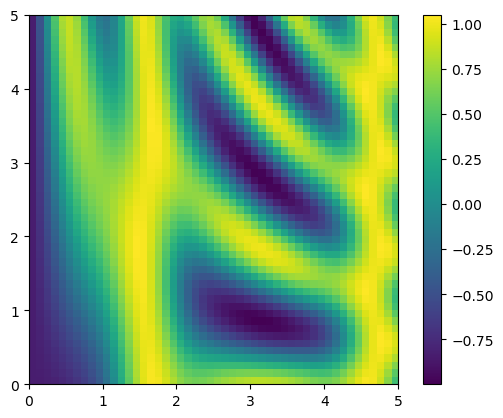

In [130]:
plt.imshow(z, origin = 'lower', extent = [0, 5, 0, 5])
plt.colorbar();
plt.show();

# Chapter 9 : Comparisons, Masks, and Boolean Logic

This chapter covers the use of *Boolean masks* to examine and manipulate values within NumPy arrays. Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion.

For example, you might wish to count all values greater than a certain value, or remove all outliers that are above some threshold. In NumPy, Boolean masking is often the most efficient way to accomplish these types of tasks.

## 9.1 Comparison Operators as Ufuncs
---

Chapter 6 introduced ufuncs, and focused in particular on arithmetic operators. We saw that using +,-,*,/, and other operators on arrays lead to element-wise operations. NumPy also implements comparison operators such as `<` and `>` as element-wise ufuncs. The result of these comparison operators is always an *array with a Boolean data type*.

In [140]:
x = np.arange(5)
print(x < 3)

[ True  True  True False False]


In [141]:
print(x > 3)

[False False False False  True]


In [142]:
print(x <= 3)

[ True  True  True  True False]


In [143]:
print(x >= 3)

[False False False  True  True]


In [144]:
print(x != 3)

[ True  True  True False  True]


In [145]:
print(x == 3)

[False False False  True False]


In [146]:
# Works on arrays of any size
rng = np.random.default_rng(seed = 1701)
x = rng.integers(10, size = (3,4))
print(x)
print(x < 6)

[[9 4 0 3]
 [8 6 3 1]
 [3 7 4 0]]
[[False  True  True  True]
 [False False  True  True]
 [ True False  True  True]]


## 9.2 Working with Boolean Arrays
---

In [147]:
# We'll be working with x created earlier
print(x)

[[9 4 0 3]
 [8 6 3 1]
 [3 7 4 0]]


### Counting Entries

To count the number of `True` entries in a Boolean array, **`np.count_nonzero`** is useful

In [148]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

Another way to do this is **`np.sum`**. In this case, `False` is interpreted as 0, and `True` is interpreted as 1.

In [149]:
np.sum(x < 6)

8

The benefit of `np.sum` is that, like other NumPy aggregation functions, this summation can be done along rows or columns as well.

In [150]:
# how many values less than 6 in each row?
np.sum(x < 6, axis = 1)

array([3, 2, 3])

If we're interested in quickly checking whether any or all the values or true, we can use **`np.any`** or **`np.all`**.

In [151]:
np.any(x > 8)

True

In [152]:
np.all(x == 6)

False

In [154]:
# np.all, np.any can be used along particular axes as well
np.all(x < 8, axis = 1)

array([False, False,  True])

Warning: Python has built in sum, any, and all functions. These have different syntax than the NumPy versions and will produce unintended results when used on multidimensional arrays.

### Boolean Operators

|Operator|Euivalent ufunc|
|--------|---------------|
|&|np.bitwise_and|
|^|np.bitwise_xor|
|\||np.bitwise_or|
|~|np.bitwise_not|

### Boolean Arrays as Masks

In [155]:
x

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]], dtype=int64)

Suppose we want an array of all values in the array that are less than, say 5. We can obtain a Boolean array for this condition easily.

In [156]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

Now, to *select* these values from the array, we can index on this Boolean array, this is known as a ***masking*** operation.

In [157]:
x[x < 5]

array([4, 0, 3, 3, 1, 3, 4, 0], dtype=int64)

What is returned is a 1-d array filled with all the values that meet this condition; in other words, all the values in positions at which the mask array is `True`. We are then free to operate on these values as we wish.

## 9.3 Using the Keywords `and`/`or` Versus the Operators `&`/`|`
---

One common point of confusion is the difference between the keywords `and` and `or` vs the operators `&` and `|`.

The difference is this : `and` and `or` operate on the object as a whole, while `&` and `|` operate on the elements within the object.

When you use `and` and `or`, it is equivalent to asking Python to treat the object as a single Boolean entry. In Python, all nonzero integers will evaluate as `True`.

In [158]:
bool(42), bool(0)

(True, False)

In [159]:
bool(42 and 0)

False

In [160]:
bool(42 or 0)

True

When you use `&` or `|` on integers, the expression operates on the bitwise representation of thte element, apply the *and* or the *or* to the individual bits making up the number

In [163]:
print(bin(42))
print(bin(59))

0b101010
0b111011


In [164]:
bin(42 & 59)

'0b101010'

In [165]:
bin(42 | 59)

'0b111011'

Note that the corresponding bits of the binary representation are compared in order to yield the result.

When you have an array of Boolean values in NumPy, this can be thought of as a string of bits where 1 = `True` and 0 = `False`, and `&` and `|` will operate similarly to in the preceeding examples.

In [167]:
A = np.array([1, 0, 1, 0, 1, 0], dtype = bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype = bool)
A | B

array([ True,  True,  True, False,  True,  True])

But if you use `or` on these arrays it will try to evaluate the truth or falsehood of the entire array object, which is not a well-defined value

In [168]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Similarly, when evaluating a Boolean expression on a given array, you should use `|` or `&` rather than `or` or `and`.

In [169]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [170]:
# we can see that using `and` will give the same error as the other example
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

REMEMBER : `and` and `or` perform a single Boolean evaluation on an entire object, while `&` and `|` perform multiple Boolean evaluations on the content of an object. For Boolean NumPy arrays, the latter is nearly always the desired operation.

# Chapter 10 : Fancy Indexing 